# [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy-polyfit)
- numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
- deg: Degree of the fitting polynomial. ie deg=1,  y = a + bx
- Least squares polynomial fit.

## [numpy.poly1d](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html)
- one-dimensional polynomial
- The polynomial’s coefficients, in decreasing powers, or if the value of the second parameter is True, the polynomial’s roots (values where the polynomial evaluates to 0).


### [Fitting lines and polynomial functions to data points](https://en.wikipedia.org/wiki/Curve_fitting)
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Curve_fitting.svg/580px-Curve_fitting.svg.png' width="200">

In [1]:
#pip install yfinance

In [2]:
#py -m pip install yfinance

In [3]:
#pip install numpy

In [4]:
#py -m pip install numpy

In [5]:
#pip install matplotlib

In [6]:
#py -m pip install matplotlib

In [43]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

## Example

In [8]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2.8, 3.2, 4.1, 5.9, 6.6, 7.3, 8.0, 10, 11])

b, a = np.polyfit(x, y, deg=1)

In [9]:
b

1.0400000000000003

In [10]:
a

1.344444444444445

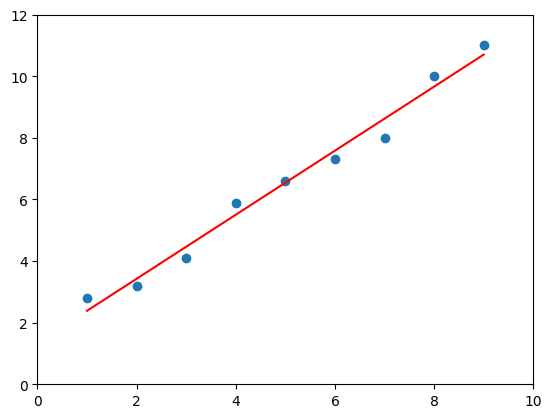

In [11]:
plt.plot(x, y, 'o')
plt.plot(x, a + b * x , 'r-')
plt.xlim(0, 10)
plt.ylim(0, 12)
plt.show()

# Process with HSI data

In [23]:
df = yf.download('^HSI', start='2025-01-01', end='2025-08-16', 
                 progress=False).droplevel('Ticker', axis=1).reset_index()
df

/var/folders/k0/qltbxq952h32hdmn8lyxcsnh0000gn/T/ipykernel_7298/3891945423.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('^HSI', start='2025-01-01', end='2025-08-16',


Price,Date,Close,High,Low,Open,Volume
0,2025-01-02,19623.320312,19932.800781,19542.980469,19932.800781,4033400000
1,2025-01-03,19760.269531,19891.859375,19634.070312,19708.740234,3393800000
2,2025-01-06,19688.289062,19851.550781,19627.839844,19848.710938,2465700000
3,2025-01-07,19447.580078,19668.650391,19252.609375,19501.449219,3581000000
4,2025-01-08,19279.839844,19483.589844,19111.539062,19390.759766,3232400000
...,...,...,...,...,...,...
148,2025-08-11,24906.810547,24969.300781,24775.730469,24946.550781,2525200000
149,2025-08-12,24969.679688,25016.289062,24801.130859,24824.070312,2368600000
150,2025-08-13,25613.669922,25613.669922,25176.519531,25176.519531,3271700000
151,2025-08-14,25519.320312,25766.619141,25449.800781,25766.619141,3330000000


In [24]:
df.index.tolist()[-1]

152

In [25]:
b, a = np.polyfit(df.index, df.Close, deg=1)

In [26]:
# Calculate Y-hat by given b, a of the polynomial function
np.poly1d(np.polyfit(df.index, df.Close, deg=2))(df.index)  

array([20067.72276268, 20118.6760538 , 20169.37073373, 20219.80680248,
       20269.98426004, 20319.90310641, 20369.5633416 , 20418.9649656 ,
       20468.10797841, 20516.99238004, 20565.61817049, 20613.98534974,
       20662.09391781, 20709.9438747 , 20757.5352204 , 20804.86795491,
       20851.94207823, 20898.75759037, 20945.31449133, 20991.6127811 ,
       21037.65245968, 21083.43352707, 21128.95598328, 21174.21982831,
       21219.22506214, 21263.97168479, 21308.45969626, 21352.68909654,
       21396.65988563, 21440.37206354, 21483.82563026, 21527.02058579,
       21569.95693014, 21612.6346633 , 21655.05378528, 21697.21429607,
       21739.11619567, 21780.75948409, 21822.14416132, 21863.27022737,
       21904.13768223, 21944.7465259 , 21985.09675839, 22025.18837969,
       22065.02138981, 22104.59578874, 22143.91157648, 22182.96875304,
       22221.76731841, 22260.30727259, 22298.58861559, 22336.6113474 ,
       22374.37546803, 22411.88097747, 22449.12787572, 22486.11616279,
      

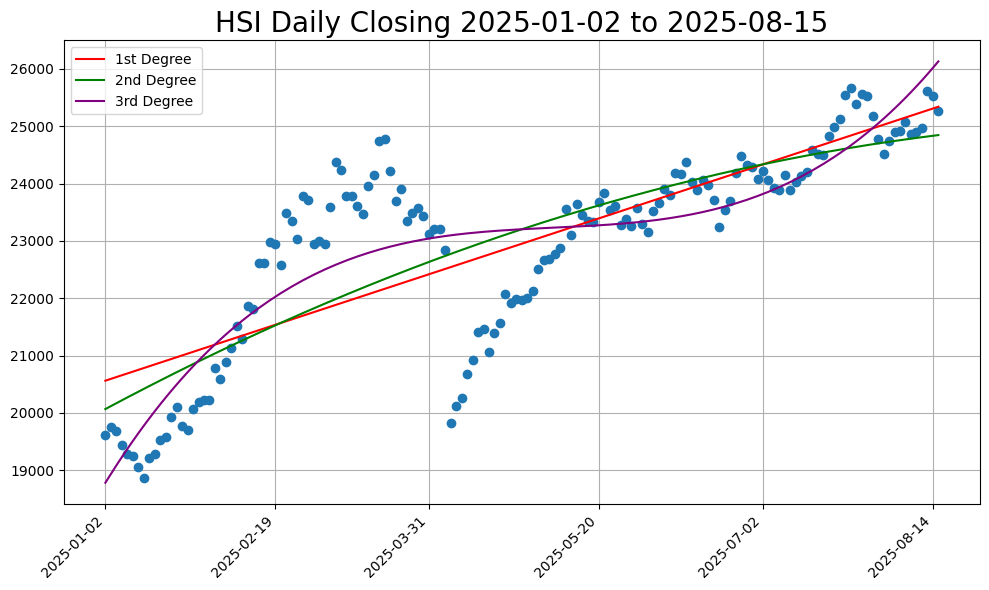

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), sharex=True)
ax.set_title(f'HSI Daily Closing {df.Date.astype(str)[0]} to {df.Date.astype(str).iloc[-1]}', fontsize=20)

ax.plot(df.Date.astype(str), df.Close, 'o')
ax.plot(df.Date.astype(str), a+b*df.index, 'r-', label='1st Degree')
ax.plot(df.Date.astype(str), np.poly1d(np.polyfit(df.index, df.Close, deg=2))(df.index), 'g-', label='2nd Degree')
ax.plot(df.Date.astype(str), np.poly1d(np.polyfit(df.index, df.Close, deg=3))(df.index), 'purple', label='3rd Degree')

ax.legend()
ax.grid(True)
ax.set_xticks(df.Date.astype(str), labels=df.Date.astype(str), rotation=45, ha='right')
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()

In [28]:
np.polyfit(df.index, df.Close, deg=1)

array([   31.42814657, 20562.35975797])

In [29]:
np.polyfit(df.index, df.Close, deg=2)

array([-1.29305593e-01,  5.10825967e+01,  2.00677228e+04])

In [30]:
np.polyfit(df.index, df.Close, deg=3)

array([ 7.46425174e-03, -1.83115499e+00,  1.54216163e+02,  1.87828265e+04])

# Build function and forecast BTC price

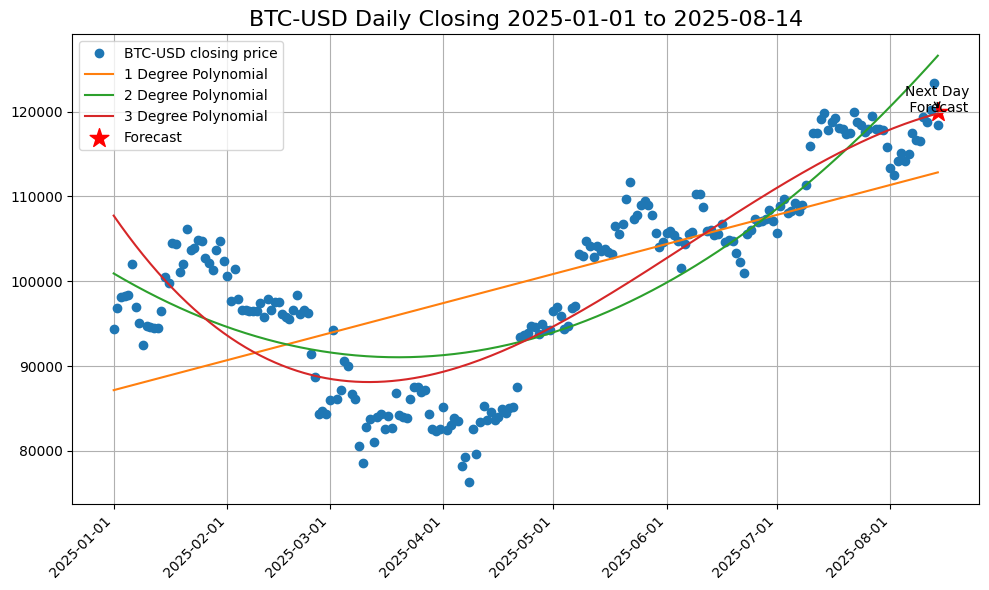

119961.696912367

In [47]:
def forecast(stock: str, start: str, deg=3, chart=False) -> float:
    '''Forecast asset price'''
    total_close = 0
    df = yf.download(stock, start=start, end='2025-8-16', auto_adjust=True, progress=False).droplevel('Ticker', axis=1).reset_index()
    for i in range(1, deg+1):
        total_close += np.poly1d(np.polyfit(df.index, df.Close, deg=i))(df.index.tolist()[-1]+1)
    
    if chart:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), sharex=True)
        ax.set_title(f'{stock} Daily Closing {df.Date.astype(str)[0]} to {df.Date.astype(str).iloc[-1]}', fontsize=16)
        
        ax.plot(df.Date.astype(str), df.Close, 'o', label=f'{stock} closing price')
        for i in range(1, deg+1):
            ax.plot(df.Date.astype(str), np.poly1d(np.polyfit(df.index, df.Close, deg=i))(df.index), 
                    label=f'{i} Degree Polynomial')
        ax.scatter(df.Date.astype(str).iloc[-1], total_close / deg, color='r', marker='*', s=200, label='Forecast')
        ax.annotate('Next Day\n Forecast', xy=(df.Date.astype(str).iloc[-1], total_close / deg), 
                    xytext=(df.Date.astype(str).iloc[-10], total_close / deg),
                    arrowprops=dict(arrowstyle='->' )   )
         
        ax.legend()
        ax.grid(True)
        ax.set_xticks(df.Date.astype(str), labels=df.Date.astype(str), rotation=45, ha='right')
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        
        plt.tight_layout()
        plt.show()
    
    return total_close / deg

forecast(stock='BTC-USD', start='2025-01-01', chart=True) # BTC-USD